# Exploratory Analysis
Now, using the dataframe with text features we can have a more in-depth exploratory analysis.

In [1]:
import os, glob, re
import pandas as pd
import numpy as np

In [2]:
os.listdir('../data/')

['speechdetails.csv',
 'features_df.pkl',
 'hp_tune_xgboost.pkl',
 'rownormaliseddocword.csv',
 'presidentspeeches']

In [4]:
df = pd.read_pickle('../data/features_df.pkl')
#Removes all the text that was in before
df = df.select_dtypes(exclude=['object'])
df.head()

,num_chars_speeches,num_word_speeches,num_sents_speeches,count_1gram_speeches,count_2gram_speeches,count_3gram_speeches,count_unique_1gram_speeches,count_unique_2gram_speeches,count_unique_3gram_speeches,ratio_unique_1gram_speeches,...,sim_tfidf_1_to_3gram_speeches_min_IC_speech2,sim_tfidf_1_to_3gram_speeches_min_IC_speech3,sim_tfidf_1_to_3gram_speeches_min_IC_speech4,sim_tfidf_1_to_3gram_speeches_max_IC_speech0,sim_w2v_speeches_min_IC_speech0,sim_w2v_speeches_min_IC_speech1,sim_w2v_speeches_min_IC_speech2,sim_w2v_speeches_min_IC_speech3,sim_w2v_speeches_min_IC_speech4,sim_w2v_speeches_max_IC_speech0
1,6677,1079,10,1076,1075,1074,479,938,1048,0.445167,...,0.0,0.0,0.0,0.0,0.980995,0.973205,0.974107,0.970233,0.976714,0.970807
2,8363,1396,29,1392,1391,1390,621,1211,1370,0.446121,...,0.0,0.0,0.0,0.0,0.991216,0.985991,0.986884,0.981601,0.982088,0.981090
3,14075,2287,34,2276,2275,2274,871,1839,2165,0.382689,...,0.0,0.0,0.0,0.0,0.991685,0.986393,0.987493,0.984941,0.982804,0.984393
4,12644,2078,35,2074,2073,2072,832,1728,1996,0.401157,...,0.0,0.0,0.0,0.0,0.992950,0.989975,0.989267,0.987198,0.984325,0.986077
9,12423,2057,42,2048,2047,2046,803,1687,1941,0.392090,...,0.0,0.0,0.0,0.0,0.990334,0.991837,0.989366,0.986045,0.976113,0.982888


In [6]:
meta_df = pd.read_csv('../data/speechdetails.csv')

## Principal Component Analysis

In [24]:
X = df.values

Min max scale so that our eigenvalues are small

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit_transform(X)

print('Eigen-analysis of the Correlation Matrix')
print('Eigenvalues: %s' %str(pca.explained_variance_)[1:-1])
print('Proportion: %s' %str(pca.explained_variance_ratio_)[1:-1])
print('Cumulative: %s' %str([np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(pca.n_components_)])[1:-1])

#print(pca.explained_variance_)

Eigen-analysis of the Correlation Matrix
Eigenvalues: 1.31314932e+09 2.17303767e+05 1.12954397e+05 1.10933806e+04
 5.80674549e+03 2.47491361e+03 7.32174147e+02 2.67935232e-02
 1.40391492e-03 8.78242488e-04
Proportion: 9.99733258e-01 1.65438766e-04 8.59949937e-05 8.44566675e-06
 4.42081985e-06 1.88421333e-06 5.57422400e-07 2.03985760e-11
 1.06883537e-12 6.68627863e-13
Cumulative: 0.9997332580955383, 0.9998986968613103, 0.9999846918549634, 0.9999931375217144, 0.9999975583415658, 0.9999994425548911, 0.999999999977291, 0.9999999999976895, 0.9999999999987583, 0.9999999999994269


In [26]:
pc_index = ['PC-'+str(num+1) for num in range(pca.n_components_)]
print(pd.DataFrame(pca.components_,columns=df.columns,index = pc_index))

       num_chars_speeches  num_word_speeches  num_sents_speeches  \
PC-1         9.364504e-01           0.153194            0.003395   
PC-2         3.260178e-01          -0.281060           -0.034396   
PC-3        -1.267373e-01           0.307006           -0.014778   
PC-4         1.827100e-02          -0.245014            0.819817   
PC-5        -1.920352e-02           0.532709            0.465708   
PC-6         2.761238e-03           0.670374           -0.029505   
PC-7         6.289894e-04          -0.100355            0.329745   
PC-8        -4.308453e-06           0.000006           -0.000016   
PC-9        -7.757175e-06          -0.000032           -0.000305   
PC-10       -6.818676e-08           0.000001           -0.000006   

       count_1gram_speeches  count_2gram_speeches  count_3gram_speeches  \
PC-1               0.152699              0.152699              0.152699   
PC-2              -0.307592             -0.307592             -0.307592   
PC-3               0.32795

In [57]:
pca = PCA(n_components=5)
pca.fit_transform(X)

print('Eigen-analysis of the Correlation Matrix')
print('Eigenvalues: %s' %str(pca.explained_variance_)[1:-1])
print('Proportion: %s' %str(pca.explained_variance_ratio_)[1:-1])
print('Cumulative: %s' %str([np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(pca.n_components_)])[1:-1])

#print(pca.explained_variance_)

Eigen-analysis of the Correlation Matrix
Eigenvalues: 1.31314932e+09 2.17303767e+05 1.12954397e+05 1.10933806e+04
 5.80674549e+03
Proportion: 9.99733258e-01 1.65438766e-04 8.59949937e-05 8.44566675e-06
 4.42081985e-06
Cumulative: 0.9997332580955383, 0.9998986968613103, 0.9999846918549634, 0.9999931375217144, 0.9999975583415658


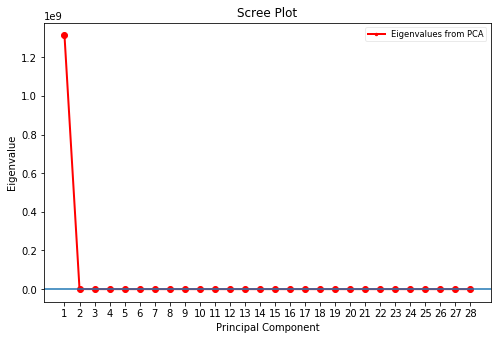

In [58]:
import matplotlib.pyplot as plt

pca_plot = PCA()
pca_plot.fit_transform(X)

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(pca_plot.n_components_) + 1
plt.plot(sing_vals, pca_plot.explained_variance_, 'ro-', linewidth=2)

#Titles & Ticks
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=1)
plt.xticks(sing_vals)

#Legend
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)

plt.subplots_adjust(top=0.9)
plt.savefig('../figs/screeplot.png')
plt.show()

In [59]:
def pca_results(data, pca):    
    # Dimension indexing
    dimensions = ['PC-{}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
    
    ax.legend(loc='lower left', bbox_to_anchor= (1.0, .51), ncol=2, 
            borderaxespad=0, frameon=False)
    plt.subplots_adjust(top=0.9)
    
    plt.savefig('../figs/pc_histogram.png')
    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

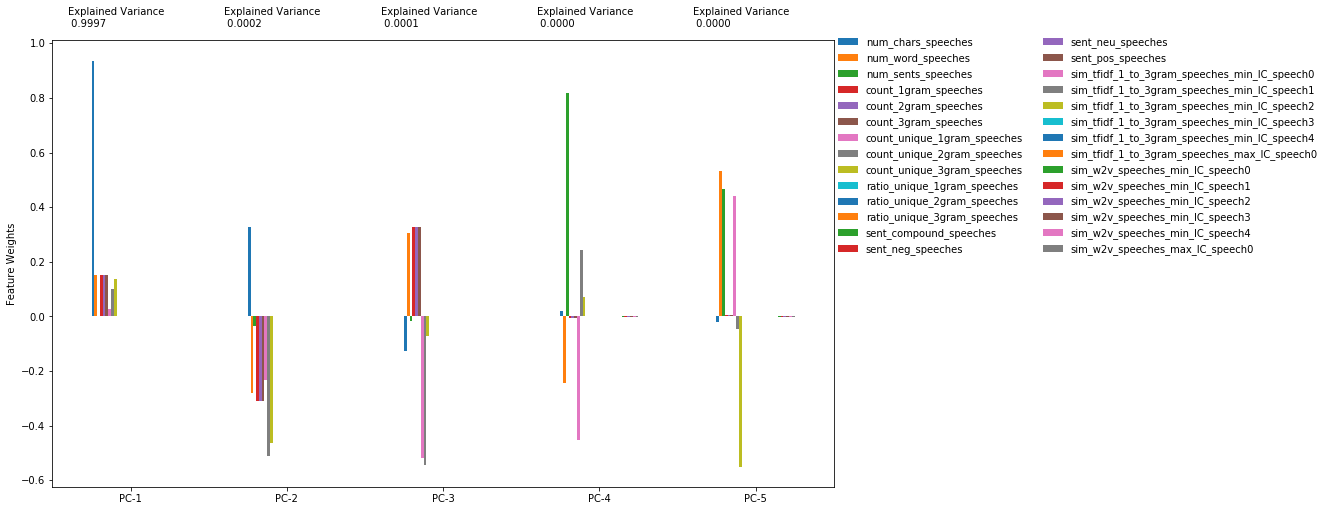

In [60]:
pca_biplot = PCA(n_components=5)
pca_results = pca_results(df, pca)

In [61]:
pca_results.cumsum()

,Explained Variance,num_chars_speeches,num_word_speeches,num_sents_speeches,count_1gram_speeches,count_2gram_speeches,count_3gram_speeches,count_unique_1gram_speeches,count_unique_2gram_speeches,count_unique_3gram_speeches,...,sim_tfidf_1_to_3gram_speeches_min_IC_speech2,sim_tfidf_1_to_3gram_speeches_min_IC_speech3,sim_tfidf_1_to_3gram_speeches_min_IC_speech4,sim_tfidf_1_to_3gram_speeches_max_IC_speech0,sim_w2v_speeches_min_IC_speech0,sim_w2v_speeches_min_IC_speech1,sim_w2v_speeches_min_IC_speech2,sim_w2v_speeches_min_IC_speech3,sim_w2v_speeches_min_IC_speech4,sim_w2v_speeches_max_IC_speech0
PC-1,0.9997,0.9365,0.1532,0.0034,0.1527,0.1527,0.1527,0.0290,0.0991,0.1377,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
PC-2,0.9999,1.2625,-0.1279,-0.0310,-0.1549,-0.1549,-0.1549,-0.2021,-0.4122,-0.3259,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
PC-3,1.0000,1.1358,0.1791,-0.0458,0.1731,0.1731,0.1731,-0.7189,-0.9551,-0.3965,...,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
PC-4,1.0000,1.1541,-0.0659,0.7740,0.1659,0.1659,0.1659,-1.1701,-0.7133,-0.3233,...,0.0,0.0,0.0,0.0,-0.0001,-0.0001,-0.0001,-0.0001,-0.0001,-0.0001
PC-5,1.0000,1.1349,0.4668,1.2397,0.1708,0.1708,0.1708,-0.7284,-0.7603,-0.8725,...,0.0,0.0,0.0,0.0,-0.0002,-0.0002,-0.0002,-0.0002,-0.0002,-0.0002


In [48]:
#This function can create the loading plot from PCA along any PCs indicated in components = list()
def loading_plot(data, reduced_data, pca, components=[1,2]):
    fig, ax = plt.subplots(figsize = (10,8))
    # scatterplot of the reduced data 
    pc1 = 'PC-'+str(components[0])
    pc2 = 'PC-'+str(components[1])
    ax.scatter(x=reduced_data.loc[:,pc1], y=reduced_data.loc[:,pc2], 
               edgecolors='b', s=70, alpha=0.5)

    feature_vectors = pca.components_.T

    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[components[0]-1], arrow_size*v[components[1]-1], head_width=0.2, head_length=0.15, linewidth=1, color='red')
        ax.text(v[components[0]-1]*text_pos, v[components[1]-1]*text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=18)
        
    ax.set_xlim([-5,5])
    ax.set_ylim([-5,5])
    ax.set_xlabel(pc1, fontsize=14)
    ax.set_ylabel(pc2, fontsize=14)
    ax.set_title("Feature projection along the " + pc1 + ' by ' +pc2 + ' plane.', fontsize=16);
    plt.subplots_adjust(top=0.9)
    plt.savefig('../figs/loading_plot.png')
    return ax

In [50]:
# creating a biplot
pca_biplot = PCA().fit(df)
reduced_data = pca_biplot.transform(df)
pca_samples = pca_biplot.transform(df)
reduced_data = pd.DataFrame(reduced_data, columns = ['PC-{}'.format(i) for i in range(1,len(pca_biplot.components_)+1)])

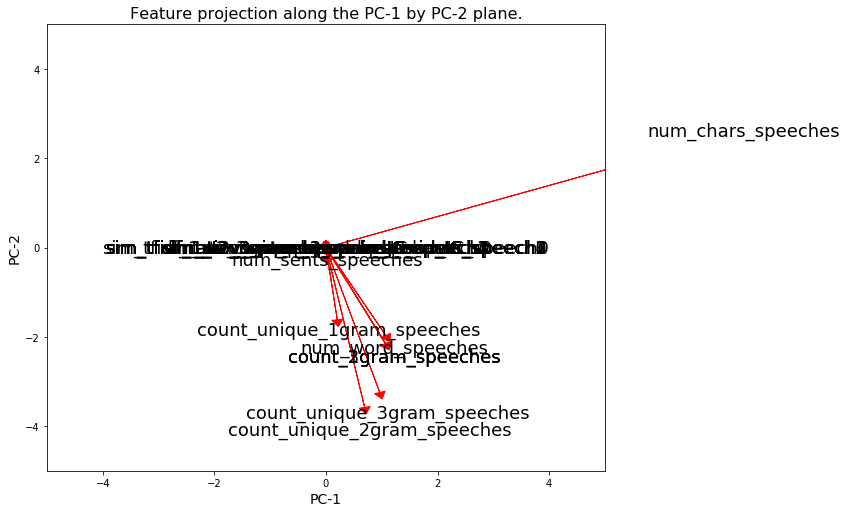

In [52]:
loading_plot(df, reduced_data, pca_biplot);